Reference: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

# 1. import data

### <span style="color:#3498DB">Point: 了解資料形式</span>

In [63]:
dict_df = pd.read_csv('data-dictionary.csv')
df = pd.read_csv('Country-data.csv')

In [64]:
dict_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


* Child Mortality Rate : 每 1000 名活產中 5 歲以下兒童死亡人數
* Fertility Rate: 在當前年齡-生育率保持不變的情況下，每位女性將生育的孩子數量
* Life Expectancy: 如果當前的死亡率模式保持不變，新生兒的平均壽命
* Health : Health總支出佔 GDP 總額的百分比
* gdpp : 總 GDP 除以總人口
* income：人均淨收入
* Inflation(通膨): The measurement of the annual growth rate of the Total GDP
* Exports: Exports of goods and services. 以佔總 GDP 的百分比表示
* Imports: Imports of goods and services. 以佔總 GDP 的百分比表示

In [65]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [66]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# 2. Descriptive statistics

In [67]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### <span style="color:#3498DB">Point1: 請觀察各變數之間的關係</span>
### <span style="color:#3498DB">Point2: 請判斷各變數之間是否有共線關係</span>

In [68]:
data=df.drop(['country'],axis=1)

<Axes: >

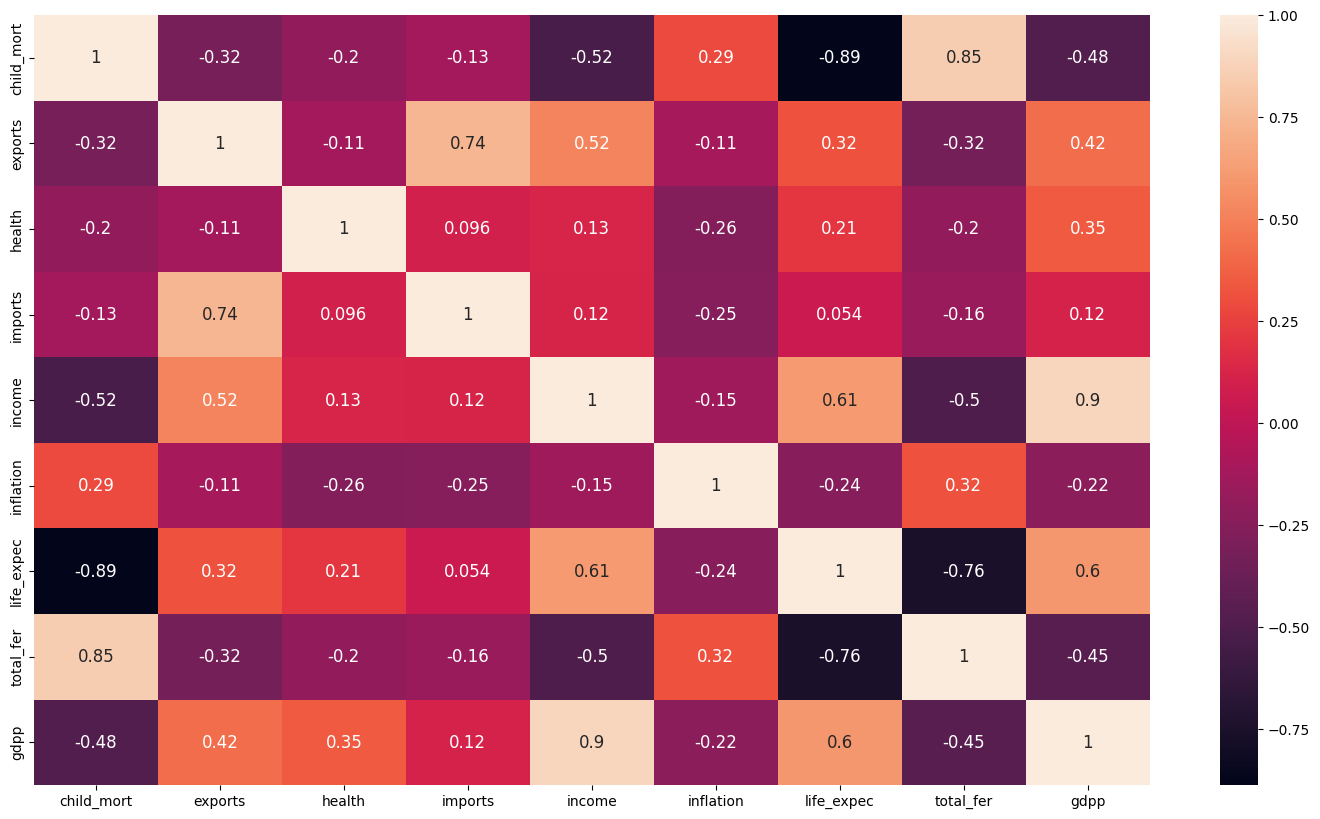

In [69]:
#correlation 
corrmat=data.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

### <span style="color:#3498DB">Point: 請觀察各變數的分佈情形與交互關係</span>

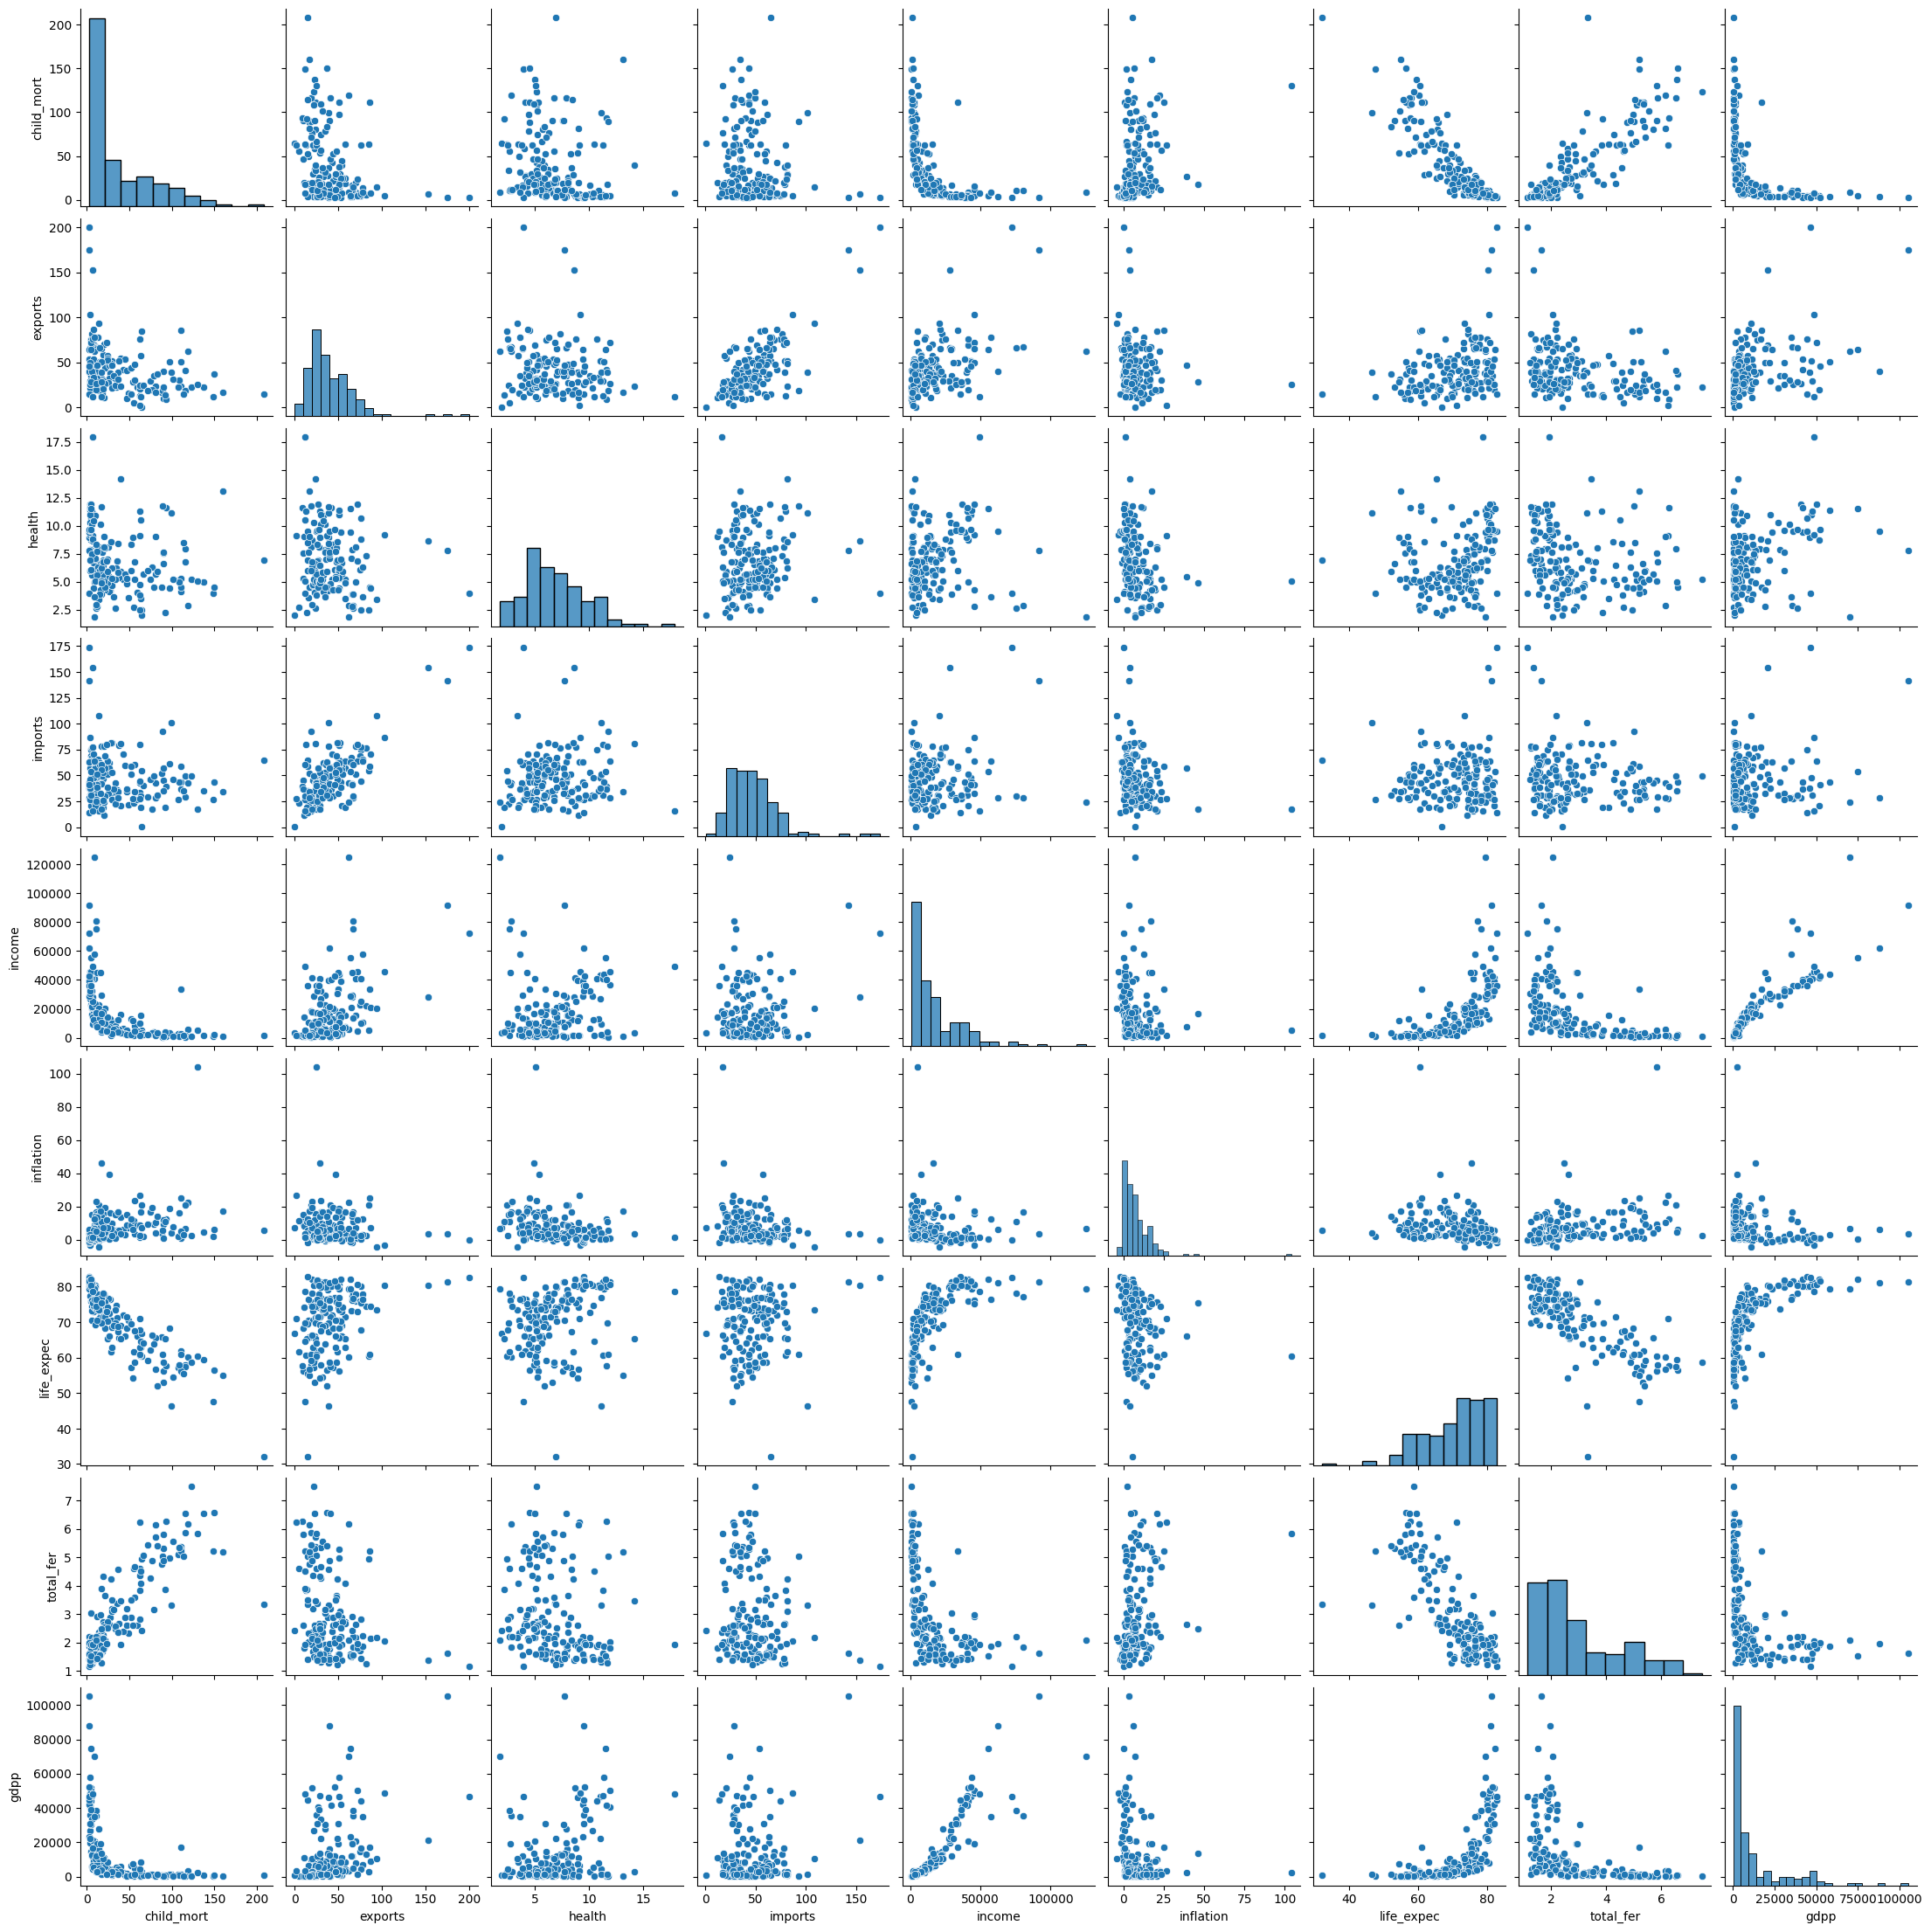

In [70]:
sns.pairplot(df)

### <span style="color:#3498DB">Point: 請觀察每個國家在變數之間的情況</span>

In [71]:
def des_df(var):
    des_df = df[['country',var]].sort_values(var, ascending = False)
    return des_df

def des_plot(var, ylab):
    plt.figure(figsize = (30,5))    
    ax = sns.barplot(x='country', y=var, data= des_df(var))
    ax.set(xlabel = '', ylabel= ylab)
    plt.xticks(rotation=90)
    return plt.show()    

## Child Mortality Rate : 每 1000 名活產中 5 歲以下兒童死亡人數

In [72]:
des_df('child_mort')

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
...,...,...
53,Finland,3.0
144,Sweden,3.0
91,Luxembourg,2.8
133,Singapore,2.8


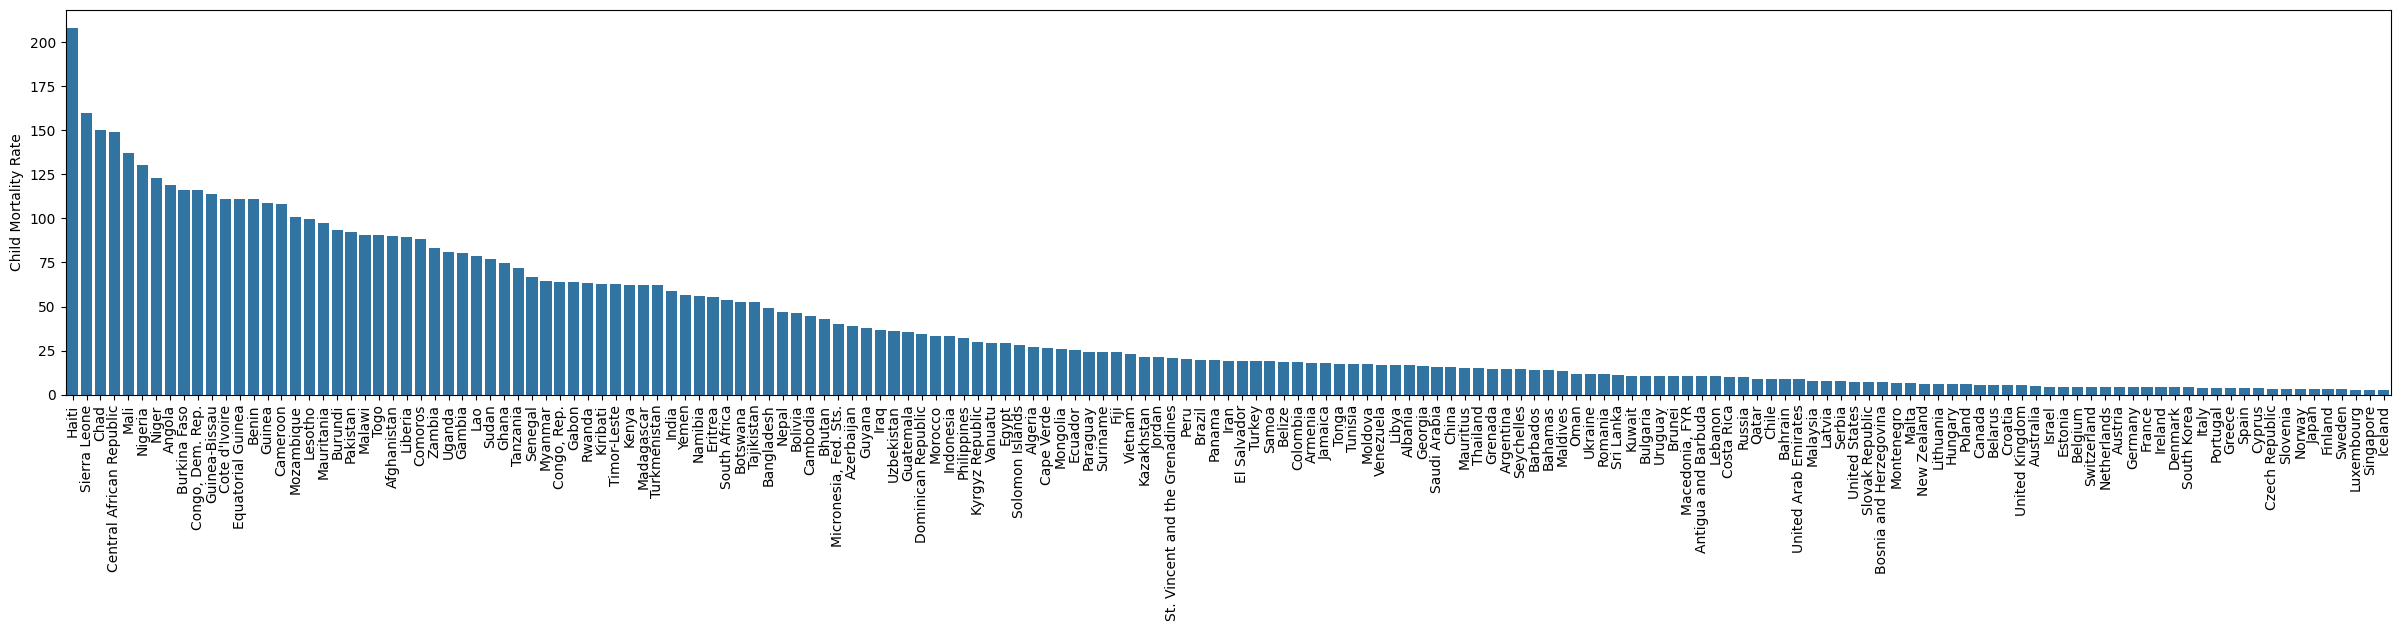

In [73]:
des_plot('child_mort', 'Child Mortality Rate')

## Fertility Rate: 在當前年齡-生育率保持不變的情況下，每位女性將生育的孩子數量

In [74]:
des_df('total_fer')

,country,total_fer
112,Niger,7.49
32,Chad,6.59
97,Mali,6.55
37,"Congo, Dem. Rep.",6.54
26,Burundi,6.26
...,...,...
20,Bosnia and Herzegovina,1.31
102,Moldova,1.27
67,Hungary,1.25
138,South Korea,1.23


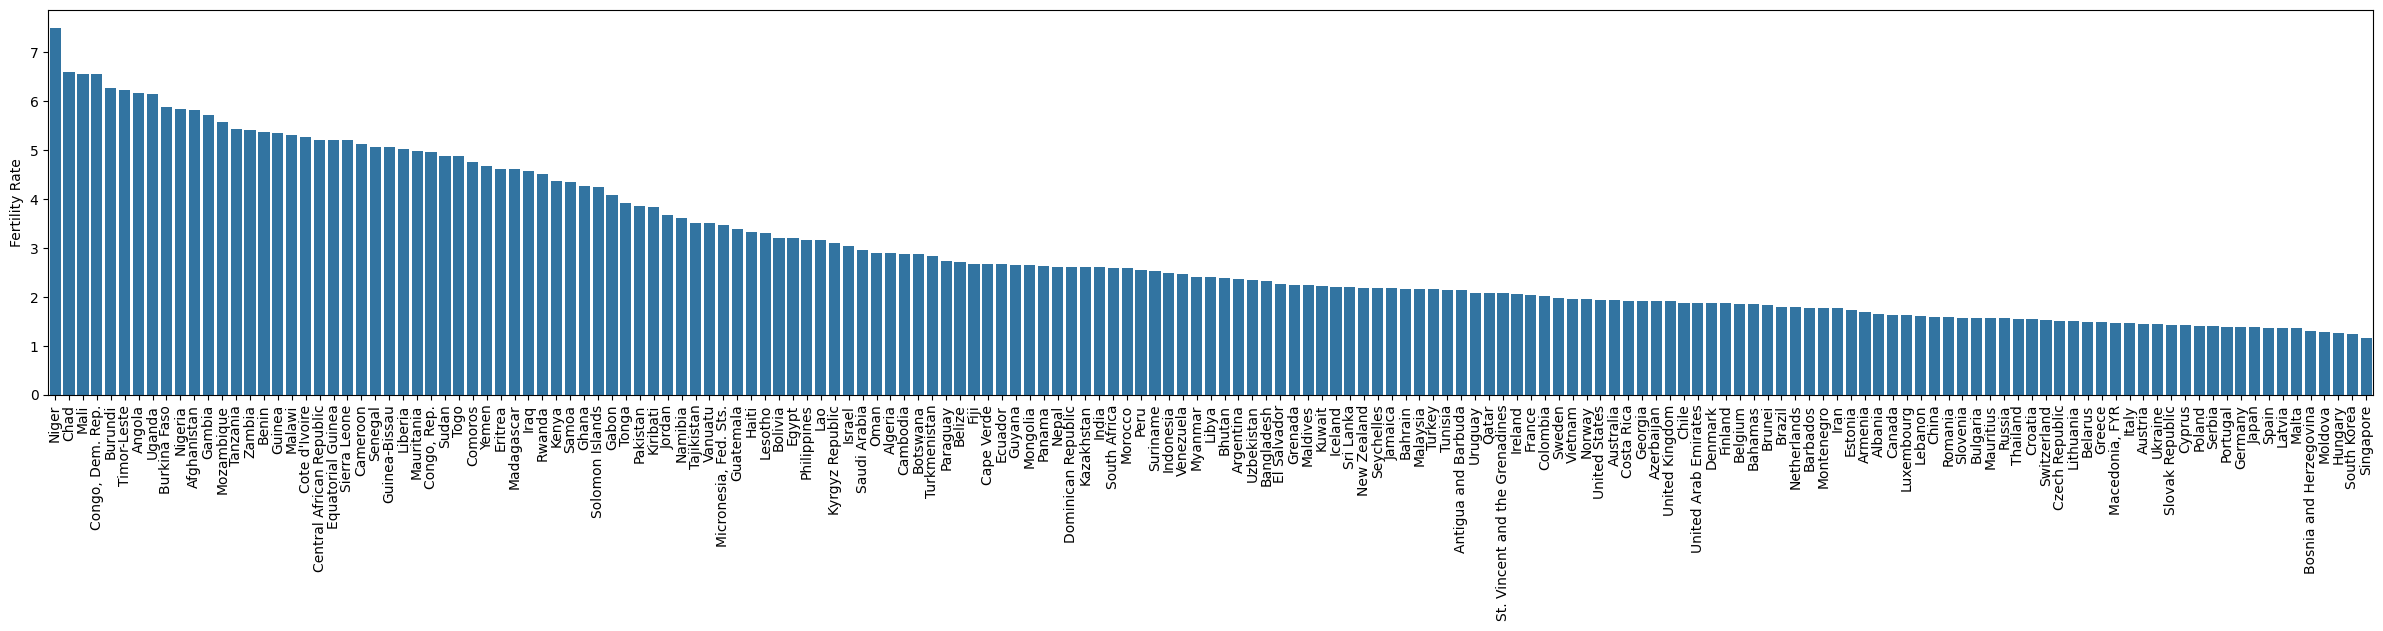

In [75]:
des_plot('total_fer', 'Fertility Rate')

## Life Expectancy: 如果當前的死亡率模式保持不變，新生兒的平均壽命

In [76]:
des_df('life_expec')

,country,life_expec
77,Japan,82.8
133,Singapore,82.7
145,Switzerland,82.2
68,Iceland,82.0
7,Australia,82.0
...,...,...
94,Malawi,53.1
166,Zambia,52.0
31,Central African Republic,47.5
87,Lesotho,46.5


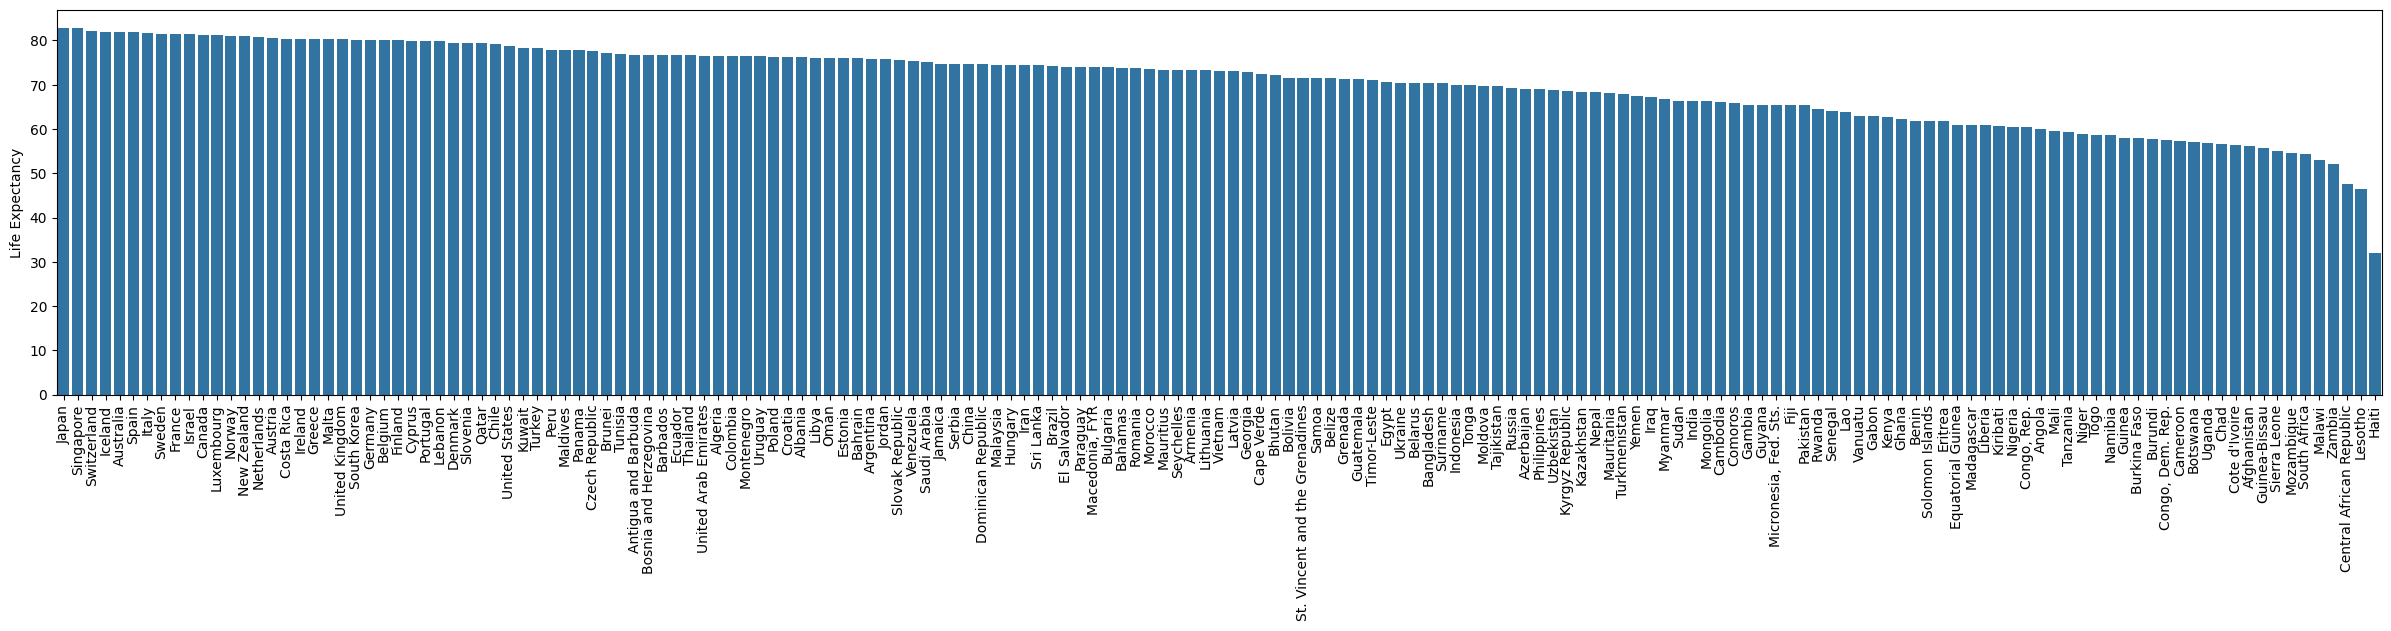

In [77]:
des_plot('life_expec', 'Life Expectancy')

## Health : Health總支出佔 GDP 總額的百分比

In [78]:
des_df('health')

,country,health
159,United States,17.90
101,"Micronesia, Fed. Sts.",14.20
132,Sierra Leone,13.10
54,France,11.90
110,Netherlands,11.90
...,...,...
154,Turkmenistan,2.50
38,"Congo, Rep.",2.46
116,Pakistan,2.20
107,Myanmar,1.97


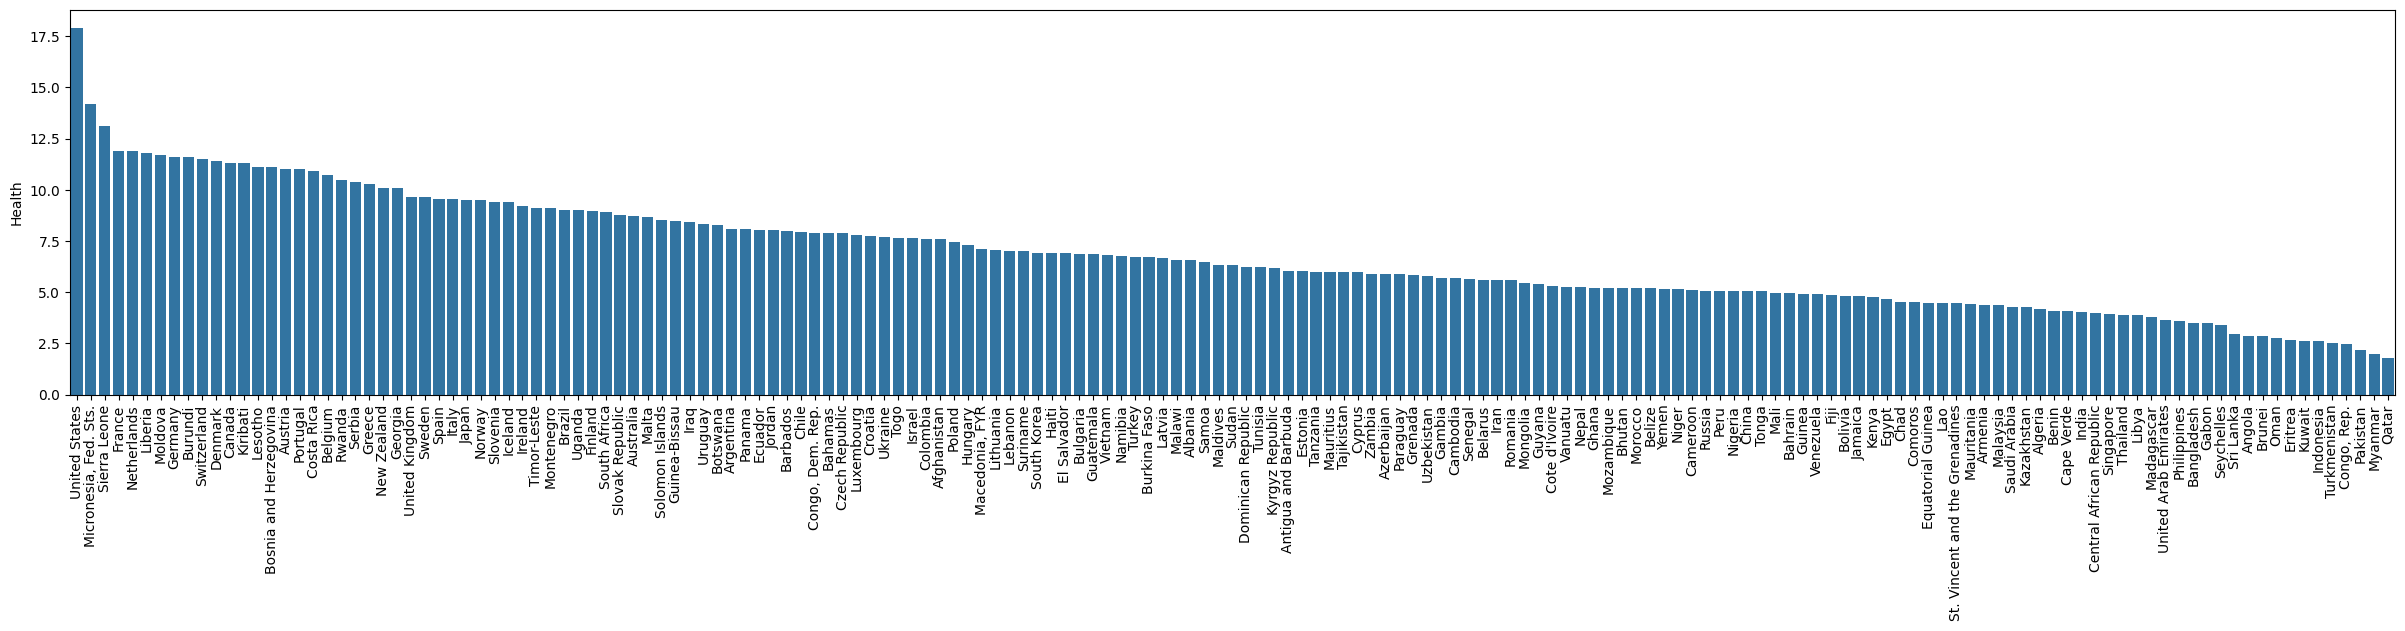

In [79]:
des_plot('health', 'Health')

## The GDP per capita : 總 GDP 除以總人口

In [80]:
des_df('gdpp')

,country,gdpp
91,Luxembourg,105000
114,Norway,87800
145,Switzerland,74600
123,Qatar,70300
44,Denmark,58000
...,...,...
132,Sierra Leone,399
112,Niger,348
37,"Congo, Dem. Rep.",334
88,Liberia,327


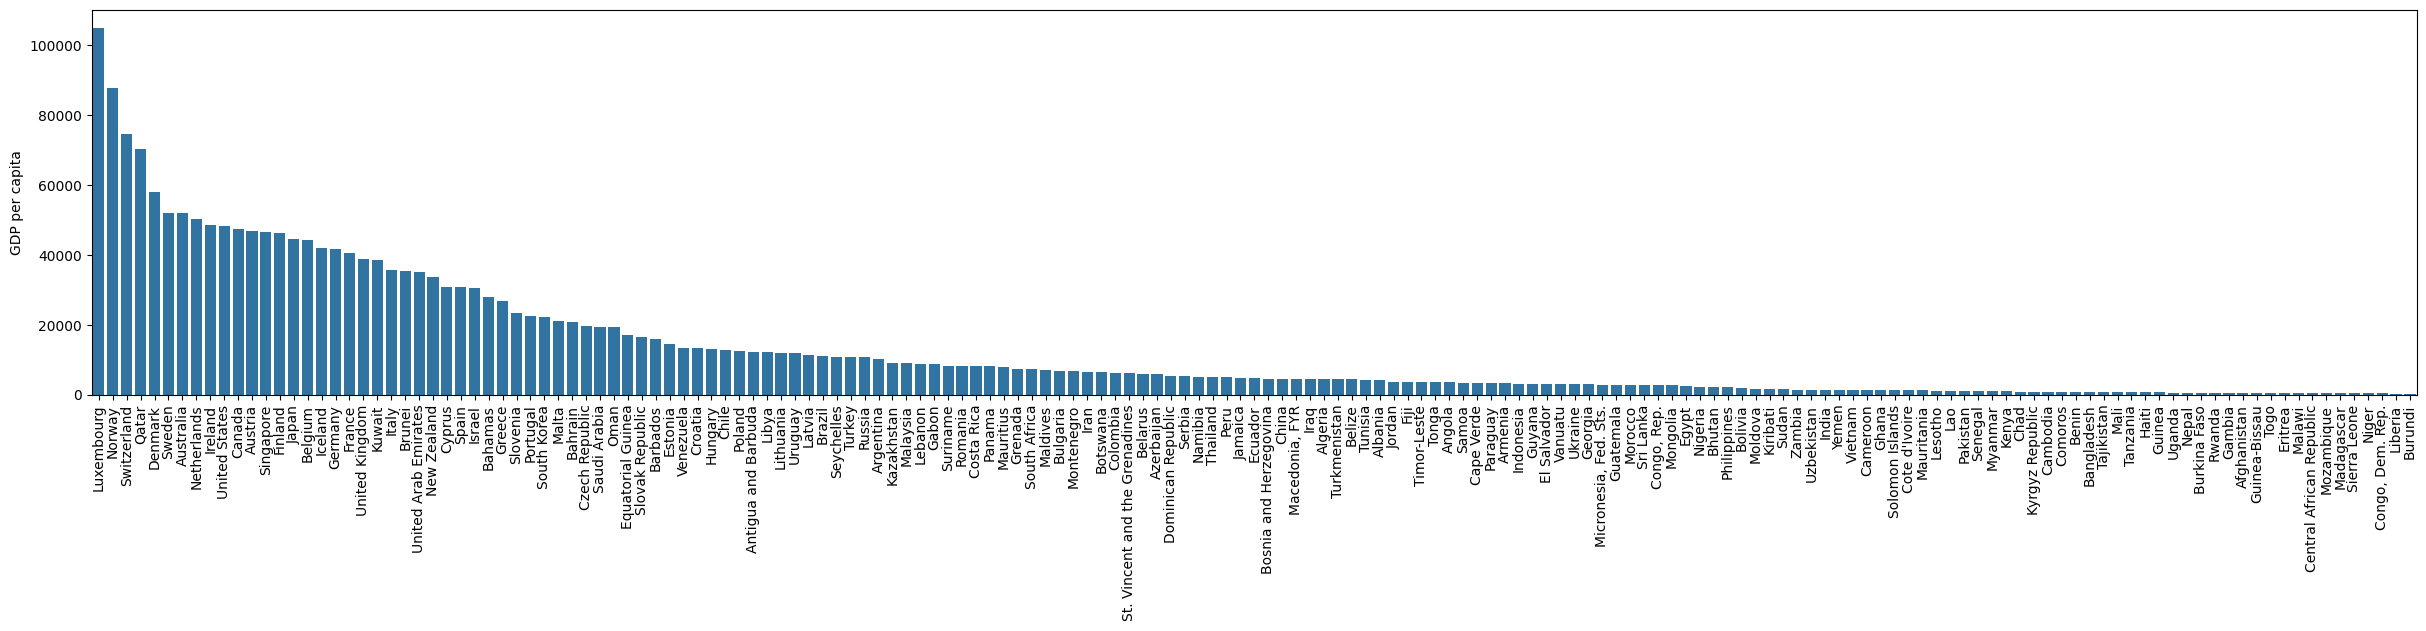

In [81]:
des_plot('gdpp', 'GDP per capita')

## income：人均淨收入

In [82]:
des_df('income')

,country,income
123,Qatar,125000
91,Luxembourg,91700
23,Brunei,80600
82,Kuwait,75200
133,Singapore,72100
...,...,...
31,Central African Republic,888
112,Niger,814
26,Burundi,764
88,Liberia,700


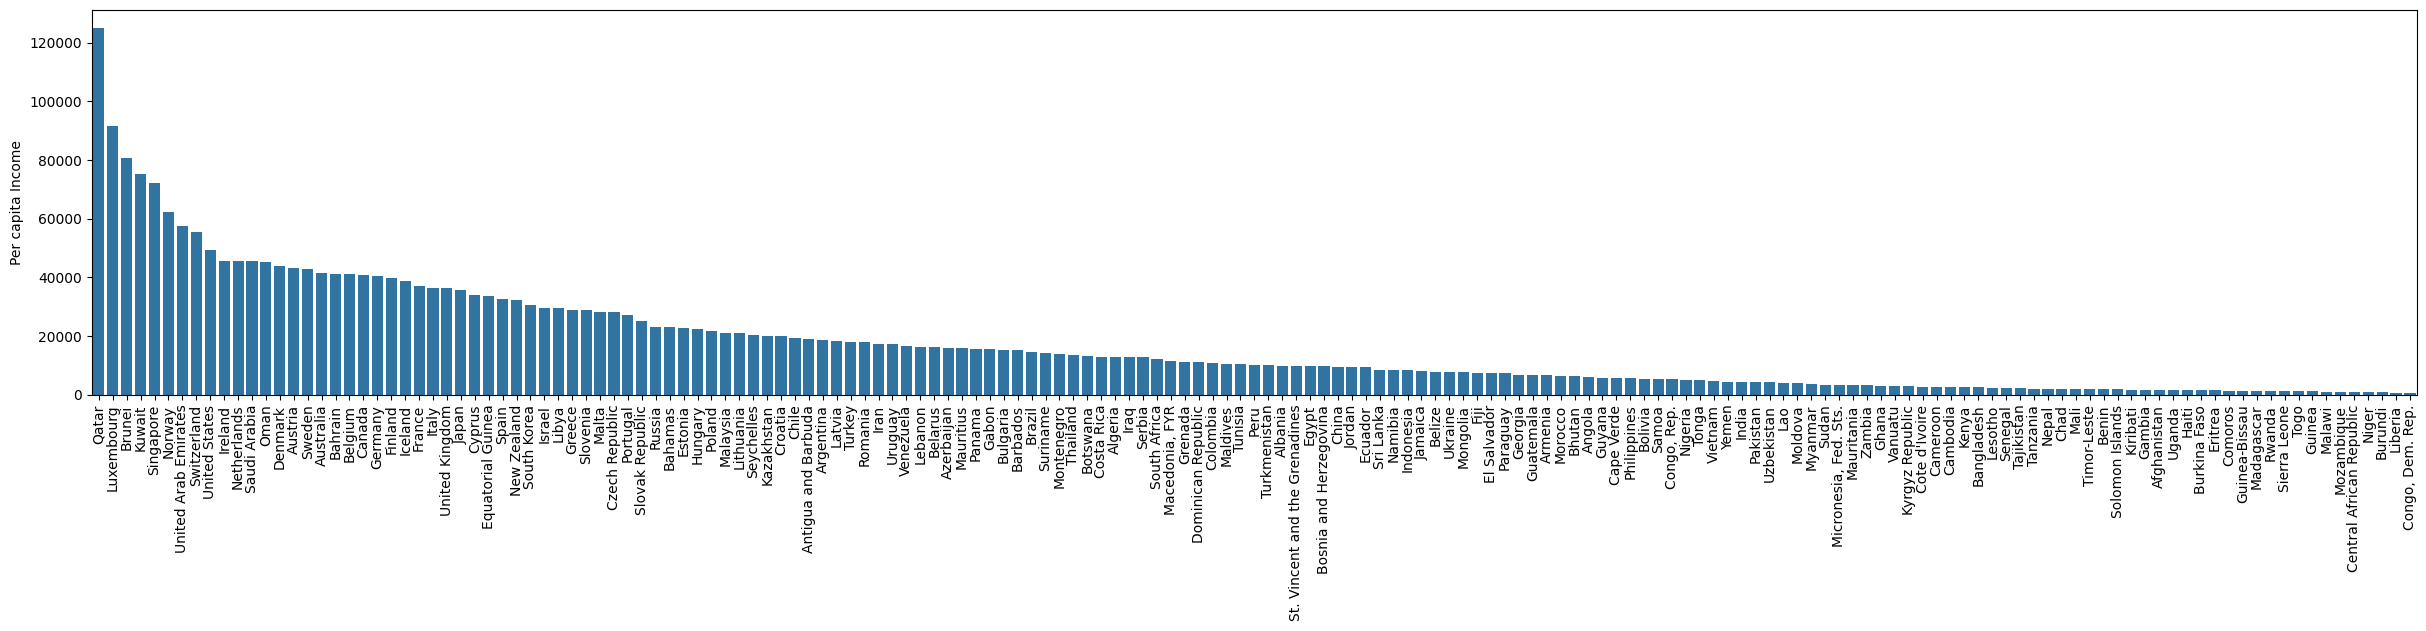

In [83]:
des_plot('income', 'Per capita Income')

## Inflation(通膨): The measurement of the annual growth rate of the Total GDP

In [84]:
des_df('inflation')

,country,inflation
113,Nigeria,104.000
163,Venezuela,45.900
103,Mongolia,39.200
149,Timor-Leste,26.500
49,Equatorial Guinea,24.900
...,...,...
135,Slovenia,-0.987
43,Czech Republic,-1.430
77,Japan,-1.900
73,Ireland,-3.220


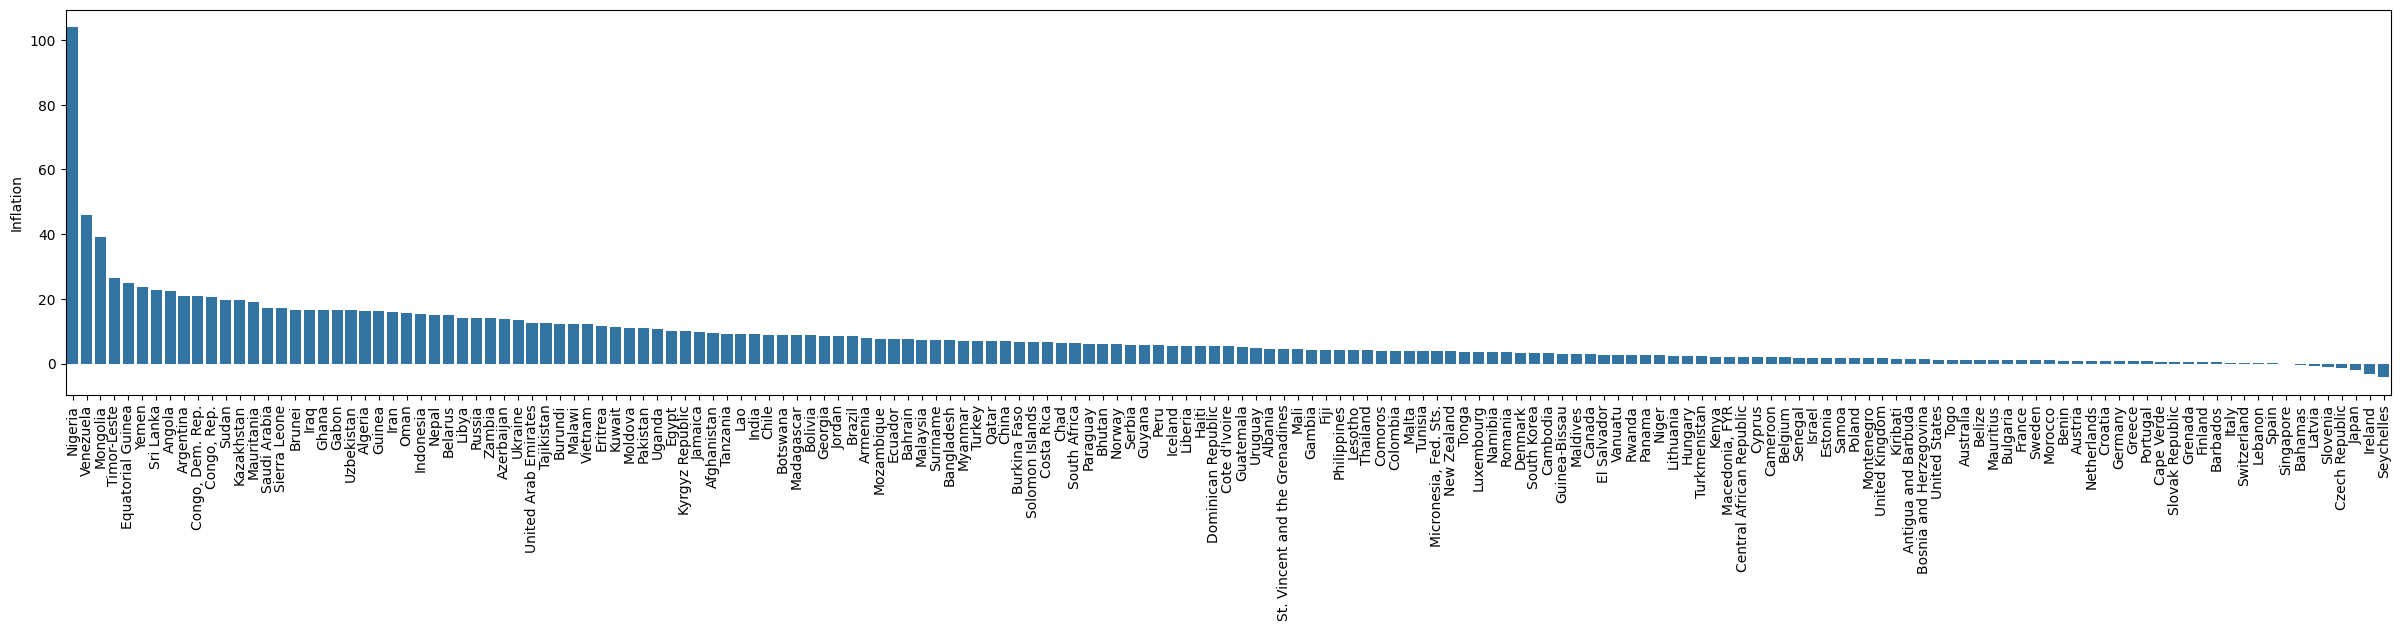

In [85]:
des_plot('inflation', 'Inflation')

## Exports: Exports of goods and services. 以佔總 GDP 的百分比表示

In [86]:
des_df('exports')

,country,exports
133,Singapore,200.000
91,Luxembourg,175.000
98,Malta,153.000
73,Ireland,103.000
131,Seychelles,93.800
...,...,...
109,Nepal,9.580
26,Burundi,8.920
50,Eritrea,4.790
149,Timor-Leste,2.200


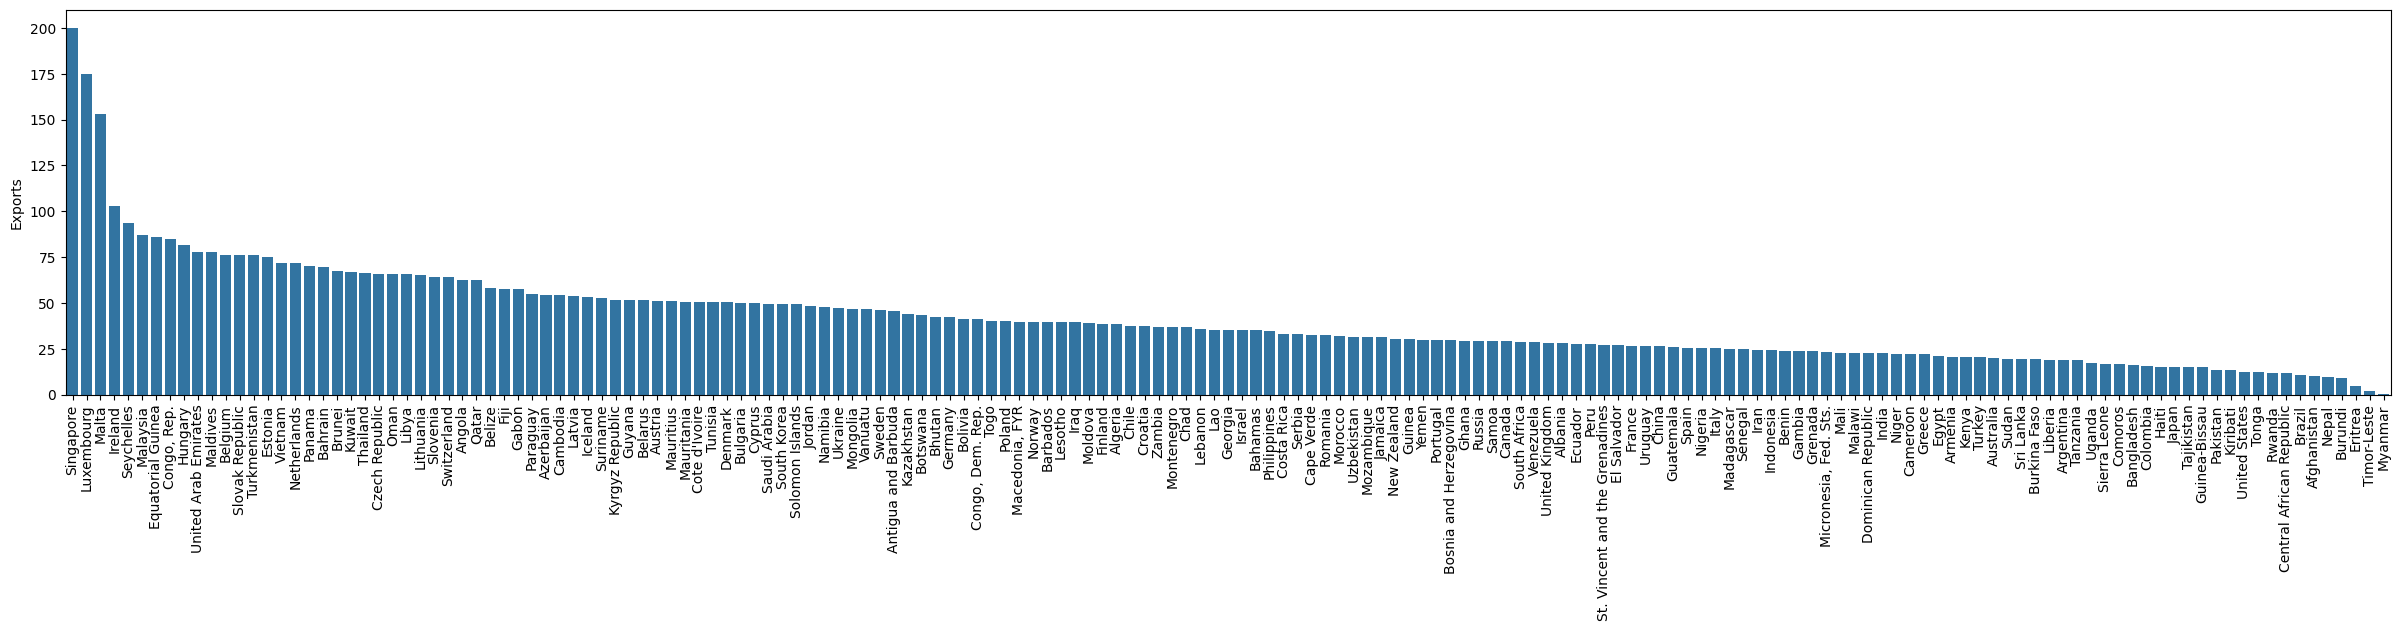

In [87]:
des_plot('exports', 'Exports')

## Imports: Imports of goods and services. 以佔總 GDP 的百分比表示

In [88]:
des_df('imports')

,country,imports
133,Singapore,174.0000
98,Malta,154.0000
91,Luxembourg,142.0000
131,Seychelles,108.0000
87,Lesotho,101.0000
...,...,...
5,Argentina,16.0000
159,United States,15.8000
77,Japan,13.6000
22,Brazil,11.8000


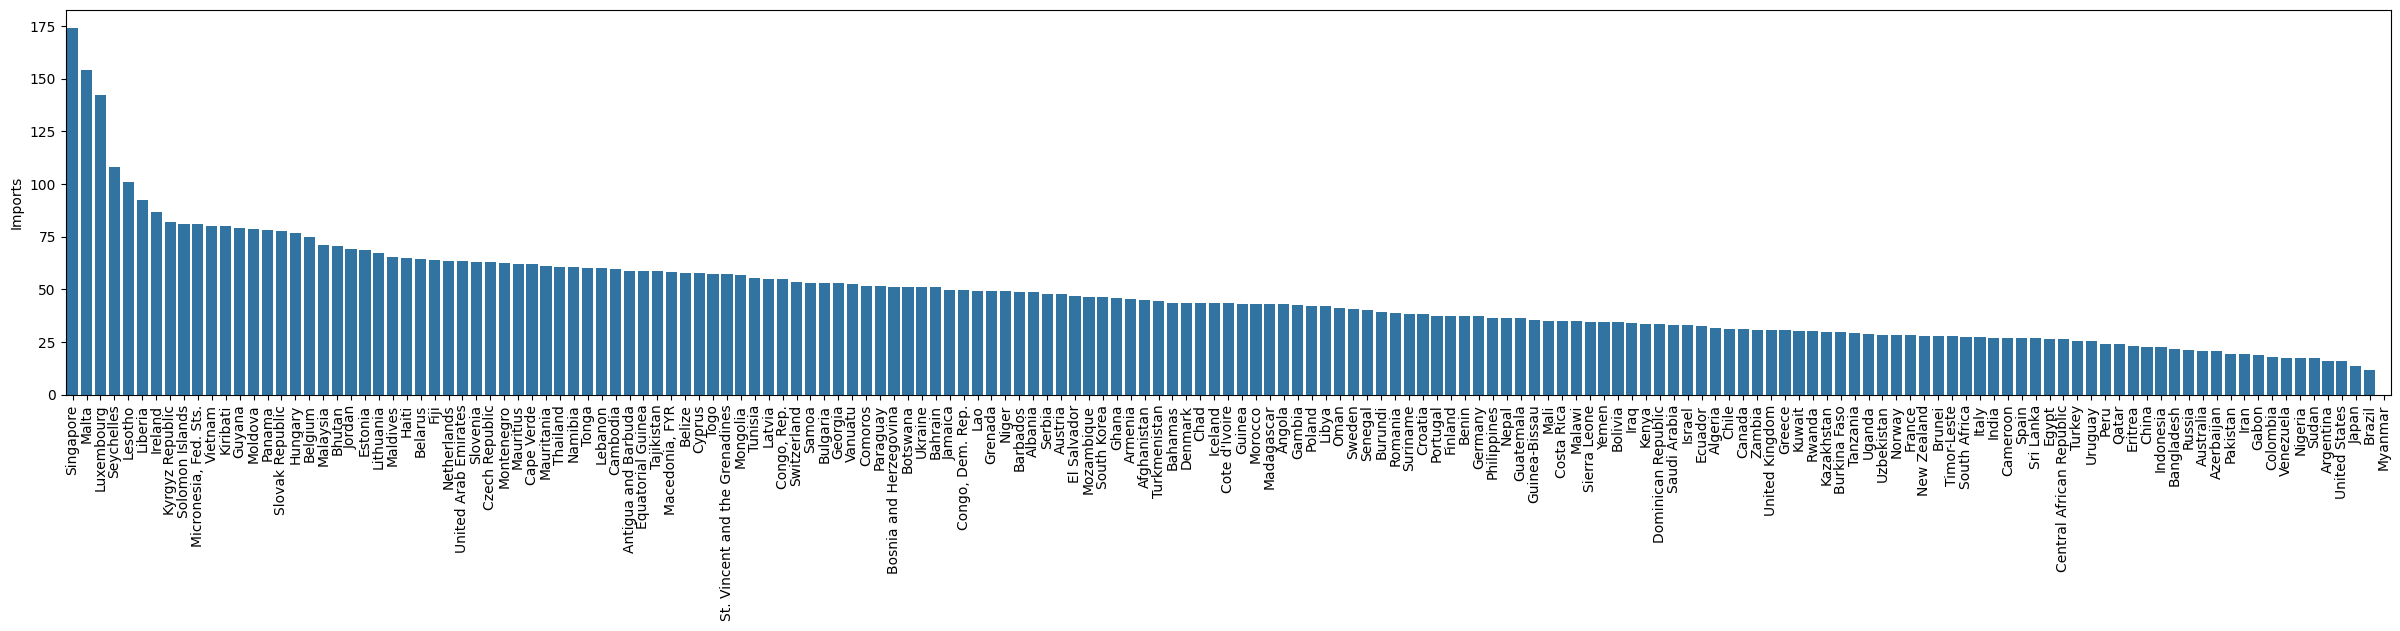

In [89]:
des_plot('imports', 'Imports')

# 3. Modeling

In [90]:
data = pd.DataFrame(df, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
                                   'inflation', 'life_expec', 'total_fer', 'gdpp'])
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [91]:
# Standarisation technique for scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
data_scaled=pd.DataFrame(scaled,columns=data.columns)

In [92]:
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## 3.1 HIERARCHICAL CLUSTERING

In [93]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 3.1.1 HC Modeling

* metric: 距離的計算方式
* method: 群與群之間的計算方式，”single”, “complete”, “average”, “weighted”, “centroid”, “median”, “ward”

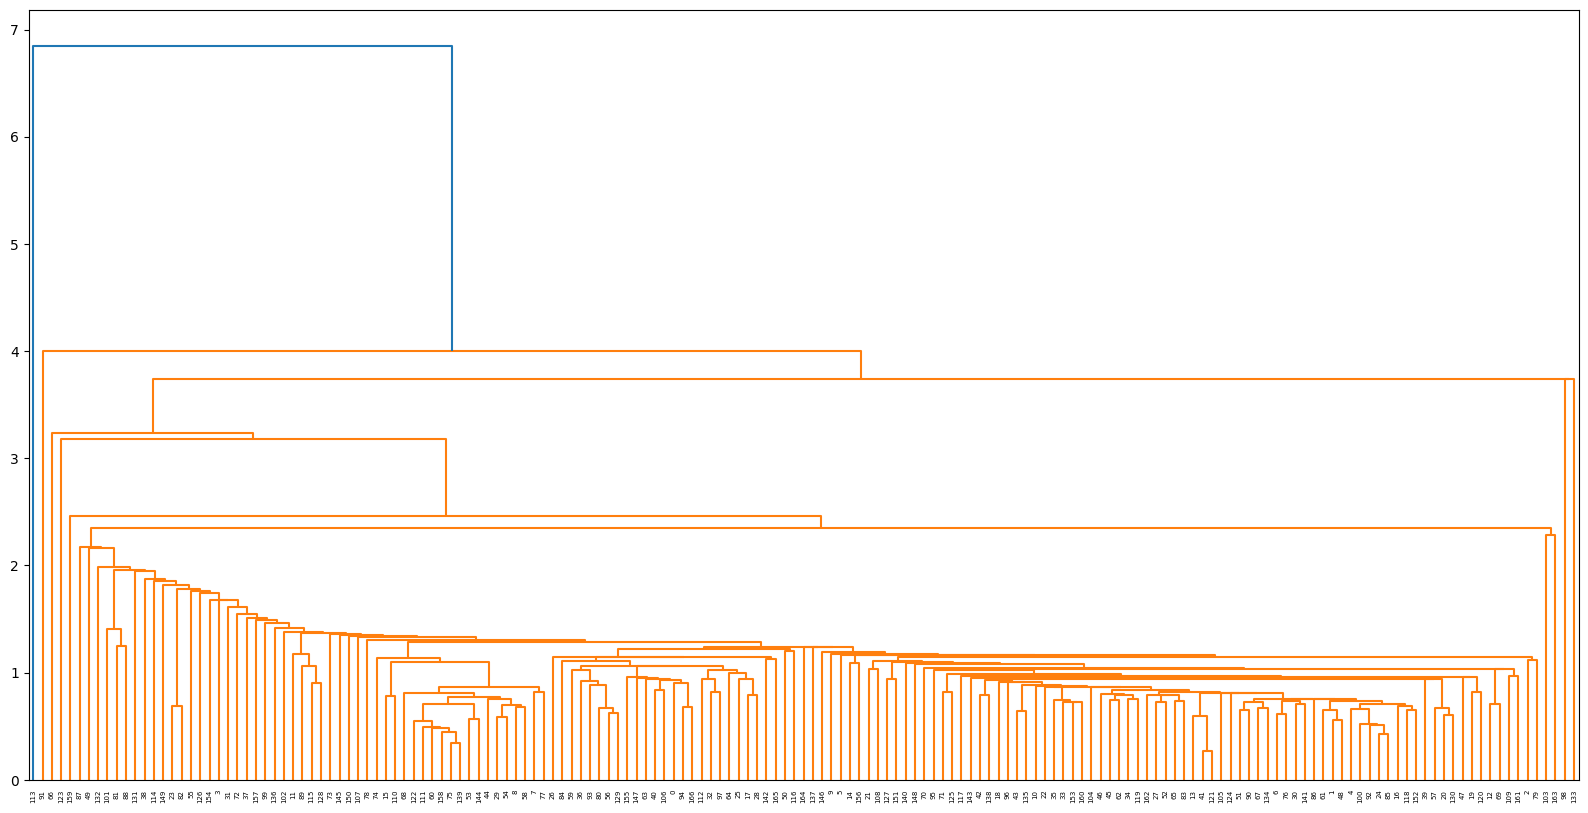

In [94]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(data_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

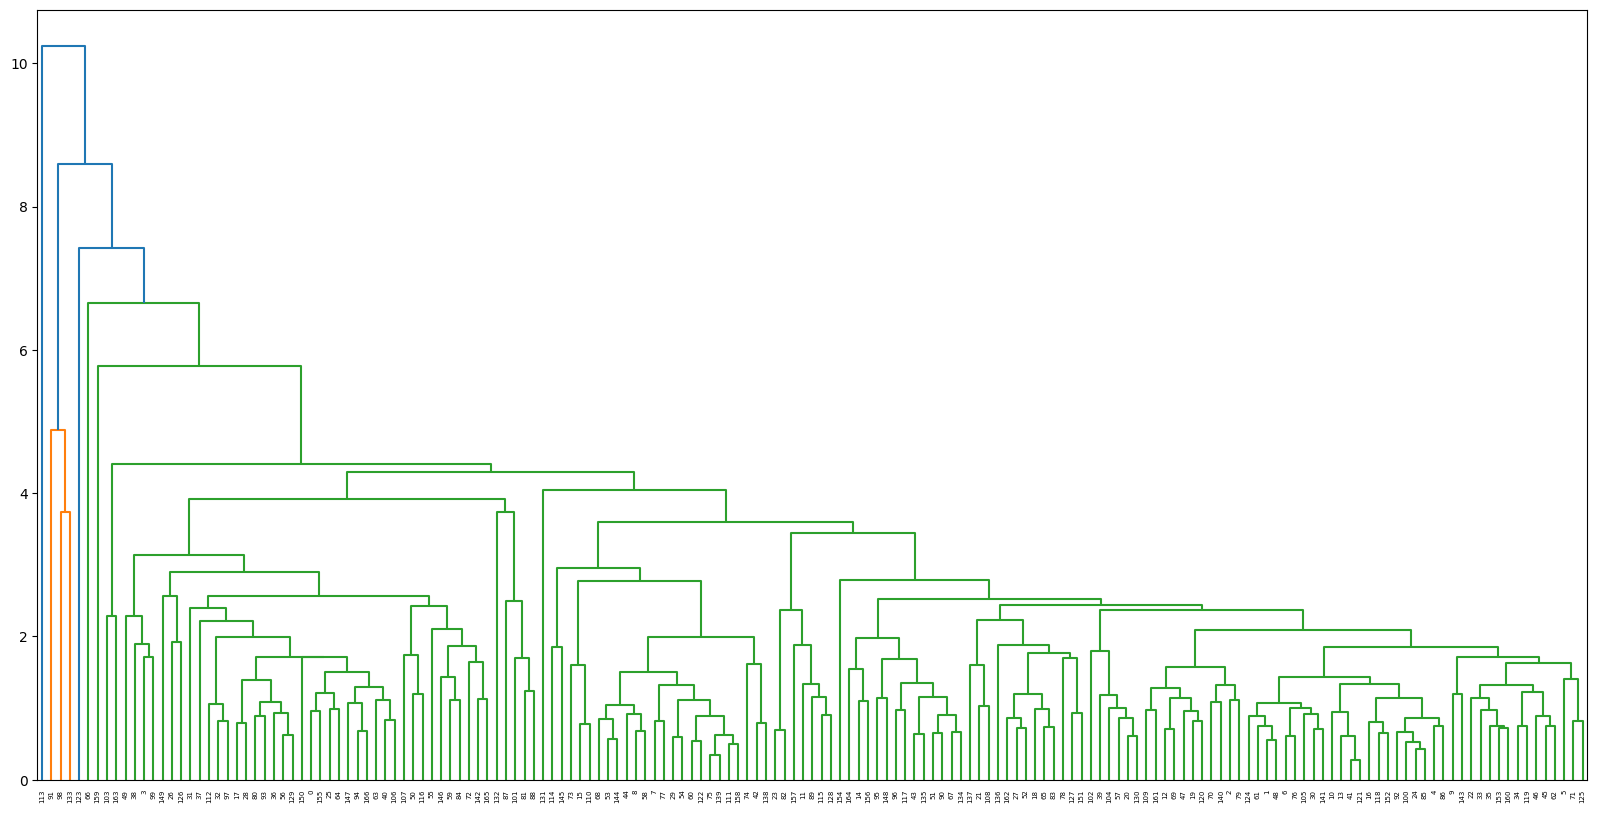

In [95]:
# Average linkage
plt.figure(figsize = (20,10))
mergings = linkage(data_scaled, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

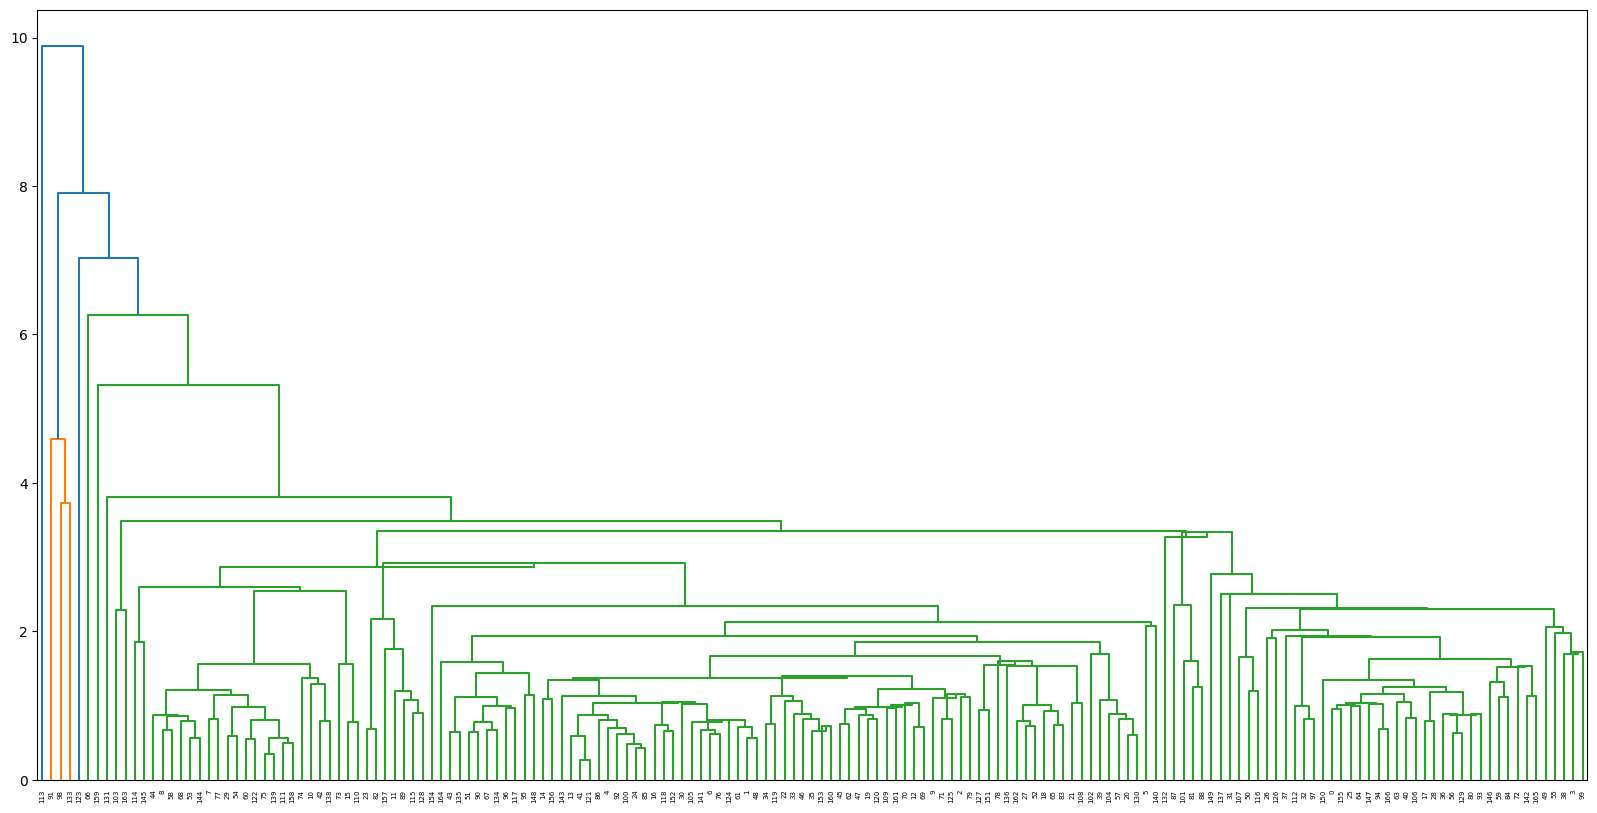

In [96]:
# Centroid linkage
plt.figure(figsize = (20,10))
mergings = linkage(data_scaled, method='centroid', metric='euclidean')
dendrogram(mergings)
plt.show()

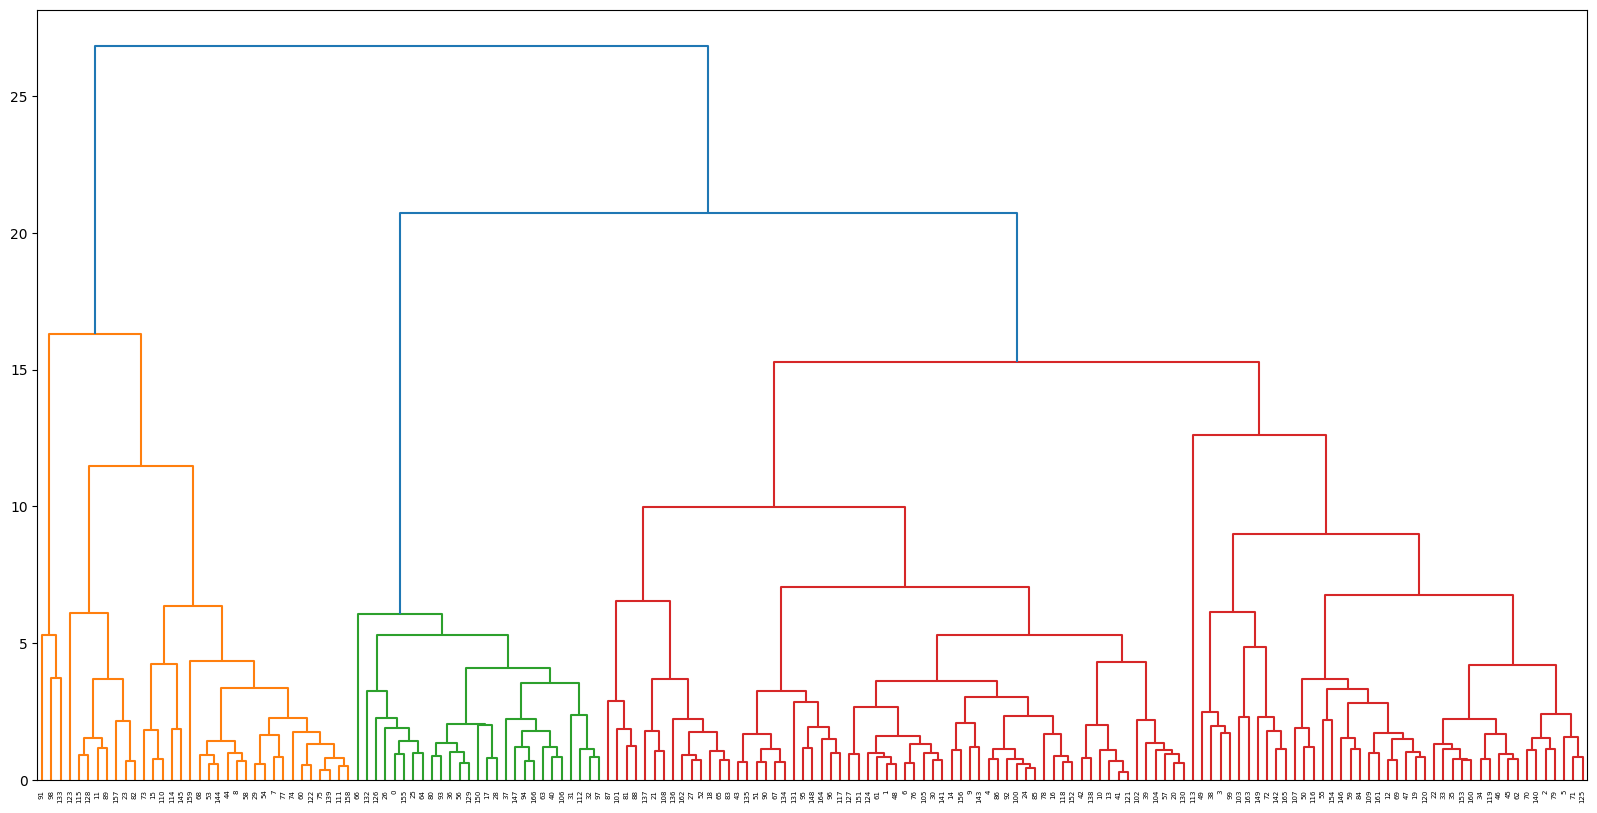

In [97]:
# Ward method
plt.figure(figsize = (20,10))
mergings = linkage(data_scaled, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

In [98]:
# 3 clusters
h_cluster = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [99]:
pred = pd.DataFrame(h_cluster, columns=['h_cluster'])
hierarchy_result = pd.concat([df.reset_index(drop=True), pred], axis=1)
hierarchy_result

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [100]:
# Number of countries in each cluster
pred.value_counts()

h_cluster
1            106
2             34
0             27
Name: count, dtype: int64

### 3.1.2 HC result analysis
### <span style="color:#3498DB">Question: 請分析各群結果</span>

In [101]:
hierarchy_result[hierarchy_result['h_cluster'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0


In [102]:
hierarchy_result[hierarchy_result['h_cluster'] == 1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1


In [103]:
hierarchy_result[hierarchy_result['h_cluster'] == 2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2


In [104]:
hierarchy_result.groupby(['h_cluster'], as_index=True).mean(numeric_only=True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
h_cluster,,,,,,,,,
0,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889
1,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925
2,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235


* Child Mortality Rate : 每 1000 名活產中 5 歲以下兒童死亡人數
* Fertility Rate: 在當前年齡-生育率保持不變的情況下，每位女性將生育的孩子數量
* Life Expectancy: 如果當前的死亡率模式保持不變，新生兒的平均壽命
* Health : Health總支出佔 GDP 總額的百分比
* gdpp : 總 GDP 除以總人口
* income：人均淨收入
* Inflation(通膨): The measurement of the annual growth rate of the Total GDP
* Exports: Exports of goods and services. 以佔總 GDP 的百分比表示
* Imports: Imports of goods and services. 以佔總 GDP 的百分比表示

### <span style="color:#3498DB">Question: gdpp相對較高的國家，各變數表現的狀況為何？</span>

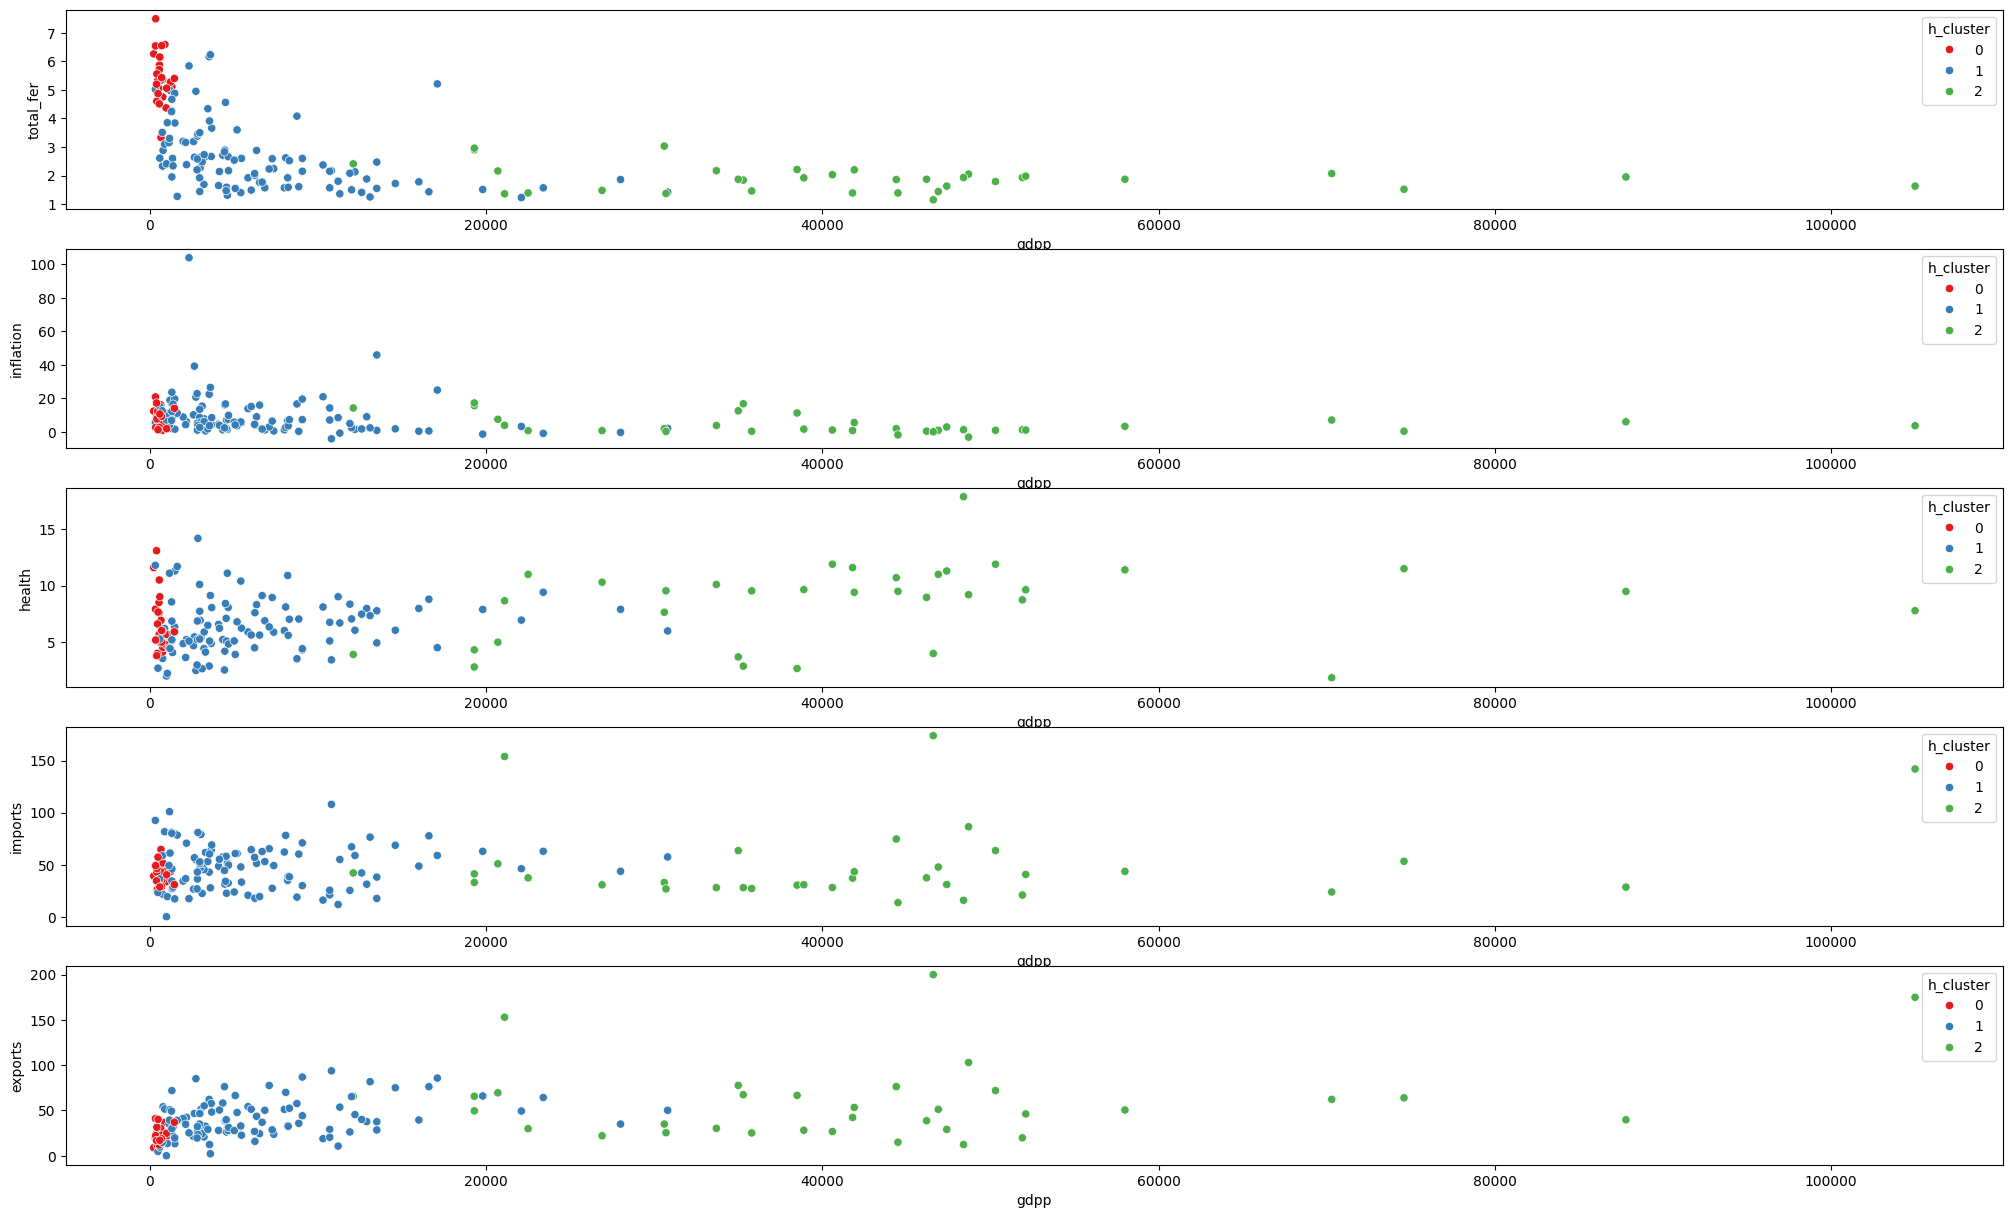

In [105]:
# Scatter plot on Original attributes to visualize the spread of the data
plt.figure(figsize = (25,15))
plt.subplot(5,1,1)
sns.scatterplot(x = 'gdpp', y = 'total_fer', hue='h_cluster',
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,2)
sns.scatterplot(x = 'gdpp', y = 'inflation', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,3)
sns.scatterplot(x = 'gdpp', y = 'health', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,4)
sns.scatterplot(x = 'gdpp', y = 'imports', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,5)
sns.scatterplot(x = 'gdpp', y = 'exports', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")

plt.show()

### <span style="color:#3498DB">Question: 請觀察極端值</span>

In [106]:
hierarchy_result.sort_values(by=['inflation'], ascending=False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500,1
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650,1
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600,1
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100,1


In [107]:
hierarchy_result.sort_values(by=['exports'], ascending=False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,2
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,1


In [108]:
hierarchy_result.sort_values(by=['imports'], ascending=False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,1
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,1


## 3.2 K-Means

### 3.2.1 判斷群數

#### 1. 手肘法則（ElbowMethod）

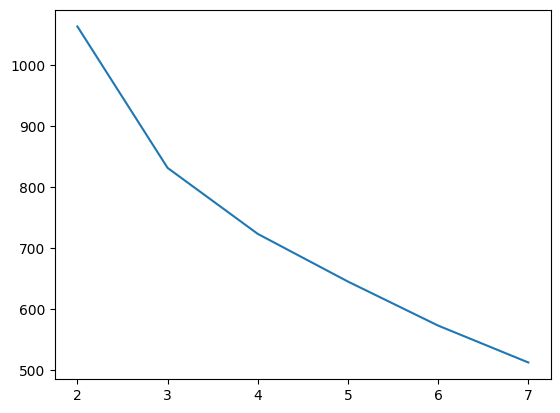

In [109]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(data_scaled)
    ssd.append(model_clus.inertia_)

plt.plot(clusters, ssd);

#### 2. 輪廓係數法（Silhouette Coefficient）
「找出相同群凝聚度越小、不同群分離度越高」的值     
* 凝聚度（a）是指與相同群內的其他點的平均距離。
* 分離度（b）是指與不同群的其他點的平均距離。 

* 輪廓的取值範圍為[-1, +1]，越接近1表示聚類效果越好，越接近-1表示聚類效果越差；如果輪廓近似為0，則說明該樣本在兩個群的邊界上。   

In [110]:
from sklearn.metrics import silhouette_score

In [111]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2862011461243982
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.29595170577528157
For n_clusters=5, the silhouette score is 0.2666500708812532
For n_clusters=6, the silhouette score is 0.199813282108936
For n_clusters=7, the silhouette score is 0.15386490986251877
For n_clusters=8, the silhouette score is 0.19364618232567288


選5群 (silhouette score越大越好)

### 3.2.2 K-Means Modeling

In [117]:
cluster = KMeans(n_clusters = 4, random_state = 111)
cluster.fit(data_scaled)

KMeans(n_clusters=4, random_state=111)

In [118]:
#count number of records in every cluster
pd.Series(cluster.labels_).value_counts()

3    84
1    34
2    33
0    16
Name: count, dtype: int64

### 3.2.3 K-Means result analysis
### <span style="color:#3498DB">Question: 請分析各群結果</span>

In [119]:
pred = pd.DataFrame(cluster.labels_, columns=['k_cluster'])
kmeans_result = pd.concat([df.reset_index(drop=True), pred], axis=1)
kmeans_result

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [120]:
kmeans_result[kmeans_result['k_cluster'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6350,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,0
66,Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662,0


In [122]:
kmeans_result[kmeans_result['k_cluster'] == 2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2


In [121]:
kmeans_result.groupby(['k_cluster'], as_index=True).mean(numeric_only=True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
k_cluster,,,,,,,,,
0,86.418750,24.988750,9.738750,56.843750,3392.125000,6.395625,56.362500,4.382500,1874.687500
1,91.735294,30.682324,4.975294,36.528409,4113.500000,14.124853,60.997059,5.157941,1926.323529
2,4.857576,58.163636,8.981515,50.872727,46893.939394,2.578182,80.393939,1.766061,44557.575758
3,20.584524,41.699762,6.152976,47.623810,13351.547619,7.522750,73.263095,2.244524,7132.428571


* Child Mortality Rate : 每 1000 名活產中 5 歲以下兒童死亡人數
* Fertility Rate: 在當前年齡-生育率保持不變的情況下，每位女性將生育的孩子數量
* Life Expectancy: 如果當前的死亡率模式保持不變，新生兒的平均壽命
* Health : Health總支出佔 GDP 總額的百分比
* gdpp : 總 GDP 除以總人口
* income：人均淨收入
* Inflation(通膨): The measurement of the annual growth rate of the Total GDP
* Exports: Exports of goods and services. 以佔總 GDP 的百分比表示
* Imports: Imports of goods and services. 以佔總 GDP 的百分比表示